In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [4]:
listing = pd.read_csv("../datasets/listings/listings.csv",sep=",")
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201105041130,2020-11-05,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20201105041130,2020-11-06,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4890,https://www.airbnb.com/rooms/4890,20201105041130,2020-11-05,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,...,10.0,10.0,10.0,NaN,f,14,14,0,0,0.21
3,5396,https://www.airbnb.com/rooms/5396,20201105041130,2020-11-06,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,...,10.0,10.0,8.0,7510402838018,f,1,1,0,0,1.66
4,7397,https://www.airbnb.com/rooms/7397,20201105041130,2020-11-05,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,...,10.0,10.0,10.0,7510400829623,f,3,3,0,0,2.31


In [9]:
listing['calendar_updated']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
66331   NaN
66332   NaN
66333   NaN
66334   NaN
66335   NaN
Name: calendar_updated, Length: 66336, dtype: float64

In [14]:
listing.groupby('room_type').id.nunique().sort_values()[::-1]

room_type
Entire home/apt    58409
Private room        7346
Hotel room          1399
Shared room          411
Name: id, dtype: int64

In [10]:
listing.groupby('name').id.nunique().sort_values()[::-1]

name
Charmant studio au coeur de Paris                    24
Studio                                               24
Charming flat in the heart of Paris                  20
RARE - Gorgeous Apartment in the Haut-Marais!        20
Appartement de charme                                17
                                                     ..
Marais. Coeur  Paris authentique.                     1
Marais. Atypical apt 4 people                         1
Marais. Appartement  à 1 ' de la Place des Vosges     1
Marais-Saint Paul                                     1
! IDEAL POUR COURT SEJOUR A PARIS !                   1
Name: id, Length: 64534, dtype: int64

In [ ]:
listing.groupby('host_id').id.nunique().sort_values()[::-1]

In [15]:
listing[listing.room_type == "Shared room"]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
427,335003,https://www.airbnb.com/rooms/335003,20200911161645,2020-09-14,Cosy parisian loft near Le Louvre - Champs Ely...,<b>The space</b><br />Typic Parisian Loft of 6...,NaN,https://a0.muscache.com/pictures/4207243/5f648...,1706168,https://www.airbnb.com/users/show/1706168,...,10.0,10.0,10.0,NaN,f,1,0,0,1,0.52
850,566511,https://www.airbnb.com/rooms/566511,20200911161645,2020-09-13,SOFA bed in the heart of paris,My apartment is located in the heart the area ...,For the last two decades the Marais is one of...,https://a0.muscache.com/pictures/5d09947e-1056...,2782865,https://www.airbnb.com/users/show/2782865,...,10.0,10.0,10.0,NaN,f,1,0,0,1,4.29
1519,850937,https://www.airbnb.com/rooms/850937,20200911161645,2020-09-14,Vintage Living room Paris Bastille,"Live with a parisian family, what a great expe...","The location is great to visit all of Paris, a...",https://a0.muscache.com/pictures/12478630/becc...,3980552,https://www.airbnb.com/users/show/3980552,...,10.0,10.0,10.0,7510400899404,f,1,0,0,1,1.52
1685,959480,https://www.airbnb.com/rooms/959480,20200911161645,2020-09-13,Authentique Appartement PARTAGÉ - Girls Only,Attention : intimité limitée car mon lit et le...,Ce que j'aime dans mon quartier ? Le marché qu...,https://a0.muscache.com/pictures/14279541/66c5...,5221729,https://www.airbnb.com/users/show/5221729,...,10.0,10.0,10.0,NaN,f,2,1,0,1,0.39
1981,1154909,https://www.airbnb.com/rooms/1154909,20200911161645,2020-09-13,Studio in the heart of Paris,You are welcome to share my studio.<br />I pro...,You are staying in the very best part of Paris...,https://a0.muscache.com/pictures/17372174/4454...,6329419,https://www.airbnb.com/users/show/6329419,...,10.0,10.0,10.0,NaN,t,1,0,0,1,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67142,45183563,https://www.airbnb.com/rooms/45183563,20200911161645,2020-09-13,Lit dans studette équipée en plein centre de P...,Studette entièrement équipée à Paris 8. <br />...,NaN,https://a0.muscache.com/pictures/7c6112b0-81aa...,32175756,https://www.airbnb.com/users/show/32175756,...,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN
67282,45255719,https://www.airbnb.com/rooms/45255719,20200911161645,2020-09-13,Little Studio @Lafayette & Haussmann Saint Lazare,"Double bed, kitchen, shower, toilet.",NaN,https://a0.muscache.com/pictures/40bcacbf-4416...,365630252,https://www.airbnb.com/users/show/365630252,...,NaN,NaN,NaN,NaN,t,2,1,0,1,NaN
67335,45283207,https://www.airbnb.com/rooms/45283207,20200911161645,2020-09-13,Studio Pres de porte de Clignancourt;,"Bureau , Wi fi , soleil toute la journée. Quar...",NaN,https://a0.muscache.com/pictures/b53e35f4-3628...,7303334,https://www.airbnb.com/users/show/7303334,...,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN
67383,45305434,https://www.airbnb.com/rooms/45305434,20200911161645,2020-09-14,Boudoir 19eme,Nice and Sweet Studio in the 19eme arondisseme...,the 19th and the 20th arrondissement of Paris ...,https://a0.muscache.com/pictures/c6993989-c616...,365205104,https://www.airbnb.com/users/show/365205104,...,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN


In [20]:
listing = listing[['id', 'scrape_id', 'last_scraped', 'name', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews']]

listing.head()

,id,scrape_id,last_scraped,name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews
0,2577,20200822123310,2020-08-25,Loft for 4 by Canal Saint Martin,NaN,Entrepôt,48.86993,2.36251,Entire loft,NaN,t,30,60,90,365,2020-08-25,1
1,3109,20200822123310,2020-08-26,zen and calm,"Paris, Île-de-France, France",Observatoire,48.83349,2.31852,Entire apartment,NaN,t,30,60,90,365,2020-08-26,9
2,4890,20200822123310,2020-08-23,Quiet Historic & Cute +Free Cruise,"Paris, Ile-de-France, France",Temple,48.86409,2.35651,Entire apartment,NaN,t,7,7,27,28,2020-08-23,22
3,5396,20200822123310,2020-08-26,Explore the heart of old Paris,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.85100,2.35869,Entire apartment,NaN,t,5,35,65,65,2020-08-26,225
4,7397,20200822123310,2020-08-26,MARAIS - 2ROOMS APT - 2/4 PEOPLE,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire apartment,NaN,t,0,7,27,285,2020-08-26,268


In [54]:
f = open("calendar.csv", "r", encoding="utf8")
count = 0
for lines in f.read():
    print(lines)
    break
print(count)

l
0


In [12]:
reviews = pd.read_csv("reviews.csv",sep=",")
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
3,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
4,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
...,...,...,...,...,...,...
1311476,45000002,655941699,2020-08-24,144864100,Osvaldo,"I had a great time in Paris, no doubt the flat..."
1311477,45008073,655941464,2020-08-24,43257600,Fouad,Merci beaucoup à Youssef pour son superbe accu...
1311478,45008073,656566695,2020-08-26,358787702,Adel,Appartement parfaitement fidèle à la descripti...
1311479,45028014,654502248,2020-08-22,66342443,Gamou,Le logement de Mohamed est décoré avec goût et...


In [5]:
del reviews['reviewer_name']
del reviews['comments']

reviews.head()

,listing_id,id,date,reviewer_id
0,2577,366217274,2019-01-02,28047930
1,3109,123127969,2016-12-27,12389804
2,3109,123274144,2016-12-28,67553494
3,3109,207127433,2017-10-28,51636494
4,3109,208779822,2017-11-03,4142888


In [87]:
calendar = pd.read_csv("calendar08.csv",sep=",")
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,33210,2020-08-26,t,$129.00,$129.00,4.0,1125.0
1,33210,2020-08-27,t,$129.00,$129.00,4.0,1125.0
2,33210,2020-08-28,t,$129.00,$129.00,4.0,1125.0
3,33210,2020-08-29,t,$129.00,$129.00,4.0,1125.0
4,33210,2020-08-30,t,$129.00,$129.00,4.0,1125.0
...,...,...,...,...,...,...,...
24667027,35090044,2021-08-21,f,$42.00,$42.00,1.0,8.0
24667028,35090044,2021-08-22,f,$42.00,$42.00,1.0,8.0
24667029,35090044,2021-08-23,f,$42.00,$42.00,1.0,8.0
24667030,35090044,2021-08-24,f,$42.00,$42.00,1.0,8.0


In [13]:
calendar = calendar.sort_values(by=["listing_id", "date"])
calendar

NameError: name 'calendar' is not defined

In [94]:
calendar = calendar.reset_index()
calendar

,level_0,index,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,0,222,2577,2020-08-25,t,$125.00,$125.00,3.0,1125.0
1,1,223,2577,2020-08-26,t,$125.00,$125.00,3.0,1125.0
2,2,224,2577,2020-08-27,t,$125.00,$125.00,3.0,1125.0
3,3,225,2577,2020-08-28,t,$125.00,$125.00,3.0,1125.0
4,4,226,2577,2020-08-29,t,$125.00,$125.00,3.0,1125.0
...,...,...,...,...,...,...,...,...,...
24667027,24667027,24575645,45070724,2021-08-21,t,$67.00,$67.00,1.0,1125.0
24667028,24667028,24575646,45070724,2021-08-22,t,$67.00,$67.00,1.0,1125.0
24667029,24667029,24575647,45070724,2021-08-23,t,$67.00,$67.00,1.0,1125.0
24667030,24667030,24575648,45070724,2021-08-24,t,$67.00,$67.00,1.0,1125.0


In [76]:
calendar.shape

(24667032, 5)

In [95]:
del calendar['price']
del calendar['index']
del calendar['adjusted_price']
#del calendar['minimum_nights']
#del calendar['maximum_nights']

calendar.head()

,listing_id,date,available,minimum_nights,maximum_nights
0,2577,2020-08-25,t,3.0,1125.0
1,2577,2020-08-26,t,3.0,1125.0
2,2577,2020-08-27,t,3.0,1125.0
3,2577,2020-08-28,t,3.0,1125.0
4,2577,2020-08-29,t,3.0,1125.0


In [14]:
calendar["available"].value_counts()

f    17738117
t     6928915
Name: available, dtype: int64

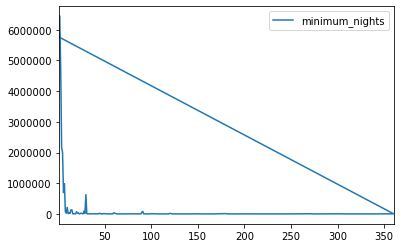

In [76]:
df = pd.DataFrame(calendar["minimum_nights"].value_counts(sort=False))
df = df[df.index < 365] 
df.plot()

In [5]:
maxi = pd.DataFrame(calendar["maximum_nights"].value_counts())
maxi = maxi.reset_index()

In [6]:
calendar.shape[0]

24667032

In [9]:
maxi["proportion"] = calendar["maximum_nights"]*100 / calendar.shape[0]
maxi.head()

,index,maximum_nights,proportion
0,1125.0,15892920,0.004561
1,30.0,1304445,0.004561
2,15.0,730140,0.004561
3,7.0,666999,0.004561
4,10.0,473079,0.004561


In [15]:
calendar.tail()

,listing_id,date,available
24667027,35090044,2021-08-21,f
24667028,35090044,2021-08-22,f
24667029,35090044,2021-08-23,f
24667030,35090044,2021-08-24,f
24667031,35090044,2021-08-25,f


In [96]:
#data = calendar[(calendar["listing_id"] == 35090044) | (calendar["listing_id"] == 19222026) | (calendar["listing_id"] == 93287)]
data = calendar
data.shape

(24667032, 5)

In [185]:
data["year"],data["month"],data["day"] = data['date'].str.split('-',2).str
data.head()

,listing_id,date,available,minimum_nights,maximum_nights,year,month,day
0,33210,2020-08-26,t,4.0,1125.0,2020,08,26
1,33210,2020-08-27,t,4.0,1125.0,2020,08,27
2,33210,2020-08-28,t,4.0,1125.0,2020,08,28
3,33210,2020-08-29,t,4.0,1125.0,2020,08,29
4,33210,2020-08-30,t,4.0,1125.0,2020,08,30


In [186]:
data["available"].value_counts()

f    17738117
t     6928915
Name: available, dtype: int64

In [97]:
def fct(group):
    return [group.iloc[0]['date'], group.iloc[-1]['date'], group.shape[0], str(group.iloc[0]['listing_id']),  group.iloc[0]['available'],  group.iloc[0]['minimum_nights'],  group.iloc[0]['maximum_nights']]

In [98]:
adj_check = (data.available != data.available.shift()).cumsum()
newData = pd.DataFrame(data.groupby(['listing_id','available',adj_check], as_index=False, sort=False).apply(fct))
newData[['start','end','num_day','listing_id','available','minimum_nights','maximum_nights']] = pd.DataFrame(newData[0].to_list(), index= newData.index)
newData["start"] = pd.to_datetime(newData["start"])
newData["end"] = pd.to_datetime(newData["end"])
del newData[0]
newData

start        end  num_day listing_id  \
listing_id available available                                             
2577       t         1         2020-08-25 2021-08-24      365       2577   
3109       t         1         2020-08-26 2021-08-25      365       3109   
4890       t         1         2020-08-23 2020-08-23        1       4890   
           f         2         2020-08-24 2020-08-24        1       4890   
           t         3         2020-08-25 2020-08-28        4       4890   
...                                   ...        ...      ...        ...   
45069732   t         171435    2020-09-23 2021-08-25      337   45069732   
45070724   f         171436    2020-08-26 2020-08-26        1   45070724   
           t         171437    2020-08-27 2020-08-30        4   45070724   
           f         171438    2020-08-31 2020-09-03        4   45070724   
           t         171439    2020-09-04 2021-08-25      356   45070724   

                               available  minimum_nights  maximum_nights  
listing_id available available                                            
2577       t         1                 t             3.0          1125.0  
3109       t         1                 t             2.0            30.0  
4890       t         1                 t             4.0           120.0  
           f         2                 f             4.0           120.0  
           t         3                 t             4.0           120.0  
...                                  ...             ...             ...  
45069732   t         171435            t             1.0            25.0  
45070724   f         171436            f             1.0          1125.0  
           t         171437            t             1.0          1125.0  
           f         171438            f             1.0          1125.0  
           t         171439            t             1.0          1125.0  

[218237 rows x 7 columns]

In [10]:
newCal = calendar.set_index(['listing_id', 'date'])
newCal

available  minimum_nights  maximum_nights
listing_id date                                                
33210      2020-08-26         t             4.0          1125.0
           2020-08-27         t             4.0          1125.0
           2020-08-28         t             4.0          1125.0
           2020-08-29         t             4.0          1125.0
           2020-08-30         t             4.0          1125.0
...                         ...             ...             ...
35090044   2021-08-21         f             1.0             8.0
           2021-08-22         f             1.0             8.0
           2021-08-23         f             1.0             8.0
           2021-08-24         f             1.0             8.0
           2021-08-25         f             1.0             8.0

[24667032 rows x 3 columns]

In [124]:
calendar[(calendar['listing_id'] == 35090044) & (calendar['date'] == '2020-08-26')]

,listing_id,date,available,minimum_nights,maximum_nights,year,month,day
24666667,35090044,2020-08-26,f,1.0,8.0,2020,08,26


In [19]:
newCal.loc[33210]

,available,minimum_nights,maximum_nights
date,,,
2020-08-26,t,4.0,1125.0
2020-08-27,t,4.0,1125.0
2020-08-28,t,4.0,1125.0
2020-08-29,t,4.0,1125.0
2020-08-30,t,4.0,1125.0
...,...,...,...
2021-08-21,t,4.0,1125.0
2021-08-22,t,4.0,1125.0
2021-08-23,t,4.0,1125.0


In [99]:
newData.shape #(309585, 8)

(218237, 7)

In [108]:
def label(row):
    try:
        if row['available'] == 'f':
            if row['num_day'] < row['minimum_nights'] or row['num_day'] > row['maximum_nights']:
                return 'closed > max nights'
            else:
                if row['num_day'] > 21:
                    return 'closed > 21 days'
                elif row['num_day'] > 14:
                    return 'closed > 14 days'
                elif row['num_day'] > 7:
                    return 'closed > 7 days'
                return 'closed < 7 days'
        else:
            return 'available'
    except:
        return 'error'
        
newData['label'] = newData.apply(label, axis=1)
newData

start        end  num_day listing_id  \
listing_id available available                                             
2577       t         1         2020-08-25 2021-08-24      365       2577   
3109       t         1         2020-08-26 2021-08-25      365       3109   
4890       t         1         2020-08-23 2020-08-23        1       4890   
           f         2         2020-08-24 2020-08-24        1       4890   
           t         3         2020-08-25 2020-08-28        4       4890   
...                                   ...        ...      ...        ...   
45069732   t         171435    2020-09-23 2021-08-25      337   45069732   
45070724   f         171436    2020-08-26 2020-08-26        1   45070724   
           t         171437    2020-08-27 2020-08-30        4   45070724   
           f         171438    2020-08-31 2020-09-03        4   45070724   
           t         171439    2020-09-04 2021-08-25      356   45070724   

                               available  minimum_nights  maximum_nights  \
listing_id available available                                             
2577       t         1                 t             3.0          1125.0   
3109       t         1                 t             2.0            30.0   
4890       t         1                 t             4.0           120.0   
           f         2                 f             4.0           120.0   
           t         3                 t             4.0           120.0   
...                                  ...             ...             ...   
45069732   t         171435            t             1.0            25.0   
45070724   f         171436            f             1.0          1125.0   
           t         171437            t             1.0          1125.0   
           f         171438            f             1.0          1125.0   
           t         171439            t             1.0          1125.0   

                                              label  
listing_id available available                       
2577       t         1                    available  
3109       t         1                    available  
4890       t         1                    available  
           f         2          closed > max nights  
           t         3                    available  
...                                             ...  
45069732   t         171435               available  
45070724   f         171436         closed < 7 days  
           t         171437               available  
           f         171438         closed < 7 days  
           t         171439               available  

[218237 rows x 8 columns]

In [101]:
calendar[calendar['listing_id'] == 93287]

,listing_id,date,available,minimum_nights,maximum_nights
55491,93287,2020-08-23,f,3.0,1125.0
55492,93287,2020-08-24,f,3.0,1125.0
55493,93287,2020-08-25,f,3.0,1125.0
55494,93287,2020-08-26,f,3.0,1125.0
55495,93287,2020-08-27,f,3.0,1125.0
...,...,...,...,...,...
55851,93287,2021-08-18,t,5.0,1125.0
55852,93287,2021-08-19,t,5.0,1125.0
55853,93287,2021-08-20,t,5.0,1125.0
55854,93287,2021-08-21,t,5.0,1125.0


In [113]:
newData[newData['listing_id'] == '93287']

start        end  num_day listing_id  \
listing_id available available                                             
93287      f         644       2020-08-23 2020-09-04       13      93287   
           t         645       2020-09-05 2020-10-01       27      93287   
           f         646       2020-10-02 2020-10-05        4      93287   
           t         647       2020-10-06 2021-03-12      158      93287   
           f         648       2021-03-13 2021-03-19        7      93287   
           t         649       2021-03-20 2021-04-20       32      93287   
           f         650       2021-04-21 2021-04-24        4      93287   
           t         651       2021-04-25 2021-05-12       18      93287   
           f         652       2021-05-13 2021-05-17        5      93287   
           t         653       2021-05-18 2021-08-22       97      93287   

                               available  minimum_nights  maximum_nights  \
listing_id available available                                             
93287      f         644               f             3.0          1125.0   
           t         645               t             3.0          1125.0   
           f         646               f             3.0          1125.0   
           t         647               t             3.0          1125.0   
           f         648               f             3.0          1125.0   
           t         649               t             3.0          1125.0   
           f         650               f             3.0          1125.0   
           t         651               t             3.0          1125.0   
           f         652               f             3.0          1125.0   
           t         653               t             3.0          1125.0   

                                          label  
listing_id available available                   
93287      f         644        closed > 7 days  
           t         645              available  
           f         646        closed < 7 days  
           t         647              available  
           f         648        closed < 7 days  
           t         649              available  
           f         650        closed < 7 days  
           t         651              available  
           f         652        closed < 7 days  
           t         653              available

In [114]:
newData['label'].value_counts()*100/newData.shape[0]

available              40.600356
closed > 21 days       20.854850
closed < 7 days        18.099589
closed > max nights    16.596636
closed > 7 days         2.898225
closed > 14 days        0.950343
Name: label, dtype: float64

In [93]:
test = pd.DataFrame(calendar.groupby(["listing_id","minimum_nights"]).minimum_nights.nunique())

In [98]:
plop = pd.DataFrame(test.groupby("listing_id").minimum_nights.sum())
plop

,minimum_nights
listing_id,
2577,1
3109,1
4890,1
5396,1
7397,1
...,...
45066830,1
45066843,1
45067450,2


In [103]:
plop['minimum_nights'].value_counts()

1    59135
2     6610
3      978
4      544
5      282
6       26
8        2
7        2
Name: minimum_nights, dtype: int64

In [41]:
data.set_value(9715159, 'available', 't')
data.head()

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,listing_id,date,available,minimum_nights,maximum_nights,year,month,day
9715157,19222026.0,2020-08-26,f,3.0,30.0,2020,08,26
9715158,19222026.0,2020-08-27,f,3.0,30.0,2020,08,27
9715159,19222026.0,2020-08-28,t,3.0,30.0,2020,08,28
9715160,19222026.0,2020-08-29,f,3.0,30.0,2020,08,29
9715161,19222026.0,2020-08-30,f,3.0,30.0,2020,08,30


In [31]:
calendar["year"],calendar["month"],calendar["day"] = calendar['date'].str.split('-',2).str
calendar.head()

,listing_id,date,available,minimum_nights,maximum_nights,year,month,day
0,33210,2020-08-26,t,4.0,1125.0,2020,08,26
1,33210,2020-08-27,t,4.0,1125.0,2020,08,27
2,33210,2020-08-28,t,4.0,1125.0,2020,08,28
3,33210,2020-08-29,t,4.0,1125.0,2020,08,29
4,33210,2020-08-30,t,4.0,1125.0,2020,08,30


In [72]:
lastMonth = calendar[calendar["month"] == "08"][calendar["year"] == "2021"]

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [75]:
lastMonth["available"].value_counts()

f    1154572
t     413034
Name: available, dtype: int64

In [48]:
data[data["available"] == "t"]

,listing_id,date,available,year,month,day
24666673,35090044,2020-09-01,t,2020,09,01
24666674,35090044,2020-09-02,t,2020,09,02
24666675,35090044,2020-09-03,t,2020,09,03
24666676,35090044,2020-09-04,t,2020,09,04
24666677,35090044,2020-09-05,t,2020,09,05
24666678,35090044,2020-09-06,t,2020,09,06
24666679,35090044,2020-09-07,t,2020,09,07
24666680,35090044,2020-09-08,t,2020,09,08
24666681,35090044,2020-09-09,t,2020,09,09
24666682,35090044,2020-09-10,t,2020,09,10


In [37]:
test = pd.Series(data["available"].to_numpy(), index=data["date"])
calmap.calendarplot(test)

AttributeError: 'Index' object has no attribute 'year'

In [38]:
print(events)

2015-11-28   -0.245426
2014-08-31    0.838652
2014-03-15   -0.208918
2015-05-28    0.674933
2015-07-06    2.442936
                ...   
2014-02-12    0.008570
2015-10-27   -0.022533
2015-09-25   -1.012280
2014-10-17    0.095830
2014-10-25    0.768195
Length: 500, dtype: float64


In [8]:
print("listing: ",listing.shape)
print("reviews: ",reviews.shape)
print("calendar: ",calendar.shape)

listing:  (67581, 18)
reviews:  (1311481, 4)
calendar:  (24667032, 3)


In [13]:
listing.dtypes

id                                int64
scrape_id                         int64
last_scraped                     object
name                             object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
property_type                    object
calendar_updated                float64
has_availability                 object
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
calendar_last_scraped            object
number_of_reviews                 int64
dtype: object

In [14]:
listing.neighbourhood.unique()

array([nan, 'Paris, Île-de-France, France',
       'Paris, Ile-de-France, France',
       'Paris 11e Arrondissement, Île-de-France, France',
       'Paris, IDF, France', 'Paris, France', 'Paris, IdF, France',
       'Paris, 4th arrondissement, Île-de-France, France',
       'Paris-13E-Arrondissement, Île-de-France, France',
       'Levallois-Perret, Île-de-France, France',
       'Paris, Île de France, France', 'Paris 5e, France',
       'Paris 4e arrondissement, Île-de-France, France',
       'Paris, Ile de France, France', 'Paris , Ile-de-France, France',
       '10th arrondissement, Paris, Île-de-France, France',
       'Paris 18e, France', 'Paris, Pigalle, France',
       'Paris, le marais, France', 'Paris 1e, France',
       'Boulogne-Billancourt, Île-de-France, France',
       'PARIS, Île-de-France, France', 'Paris, Paris province, France',
       'Paris, Ã\x8ele-de-France, France', 'Paris 2e, France',
       'Paris 11e arrondissement, Île-de-France, France',
       'Le Kremlin-B

In [15]:
listing.neighbourhood_cleansed.unique()

array(['Entrepôt', 'Observatoire', 'Temple', 'Hôtel-de-Ville', 'Opéra',
       'Louvre', 'Popincourt', 'Buttes-Montmartre', 'Élysée', 'Gobelins',
       'Luxembourg', 'Buttes-Chaumont', 'Panthéon', 'Palais-Bourbon',
       'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Passy'], dtype=object)

In [46]:
 df = pd.DataFrame({'user' : ['A', 'A', 'A', 'B', 'B', 'B','B'],
              'location' : ['house','house','gym','gym','shop','gym','gym'], 
              'duration':[10,5,5,4,10,4,6]})

In [51]:
adj_check = (df.location != df.location.shift()).cumsum()
df.groupby(['user', 'location', adj_check], as_index=False, sort=False)['duration'].sum()

,user,location,duration
0,A,house,15
1,A,gym,5
2,B,gym,4
3,B,shop,10
4,B,gym,10
